# Exploratory Data Analysis
This notebook contains visualizations and analysis of solar radiation data.

## Goals:
- Analyze solar patterns across regions.
- Identify high-potential regions for solar installations.


In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

### Load Data
 We'll analyze solar radiation data from three locations:
 - Malanville, Benin
 - Bumbuna, Sierra Leone  
 - Dapaong, Togo


In [2]:
# Load datasets
benin_df = pd.read_csv('../data/benin-malanville.csv')
sierraleone_df = pd.read_csv('../data/sierraleone-bumbuna.csv')
togo_df = pd.read_csv('../data/togo-dapaong_qc.csv')

 ### Add Region Identifiers
 Before combining the datasets, we'll add a region identifier column to each dataframe
 to track the source location after merging.


In [24]:
# Add a region identifier to each datasetn for combination porpuse
benin_df['Region'] = 'Benin'
sierraleone_df['Region'] = 'Sierra Leone'
togo_df['Region'] = 'Togo'

# Combine datasets
combined_df = pd.concat([benin_df, sierraleone_df, togo_df], ignore_index=True)
combined_df.head(5)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Region
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


### Calculate Regional Summary Statistics
We'll calculate detailed summary statistics for all numeric variables by region, including:
- Central tendency (mean, median)
- Variability (standard deviation, quartiles)
- Range (min/max values)
- Distribution shape (skewness, kurtosis)
- Count of valid observations

In [25]:

# Calculate detailed summary statistics for each region
numeric_cols = combined_df.select_dtypes(include=[np.number]).columns
regional_stats = {}

for region in combined_df['Region'].unique():
    region_data = combined_df[combined_df['Region'] == region][numeric_cols]
    stats = region_data.describe().round(2)
    regional_stats[region] = stats
    
    print(f"\nSummary Statistics for {region}:")
    print("=" * 80)
    print(stats)
    print("\n")


Summary Statistics for Benin:
             GHI        DNI        DHI       ModA       ModB       Tamb  \
count  525600.00  525600.00  525600.00  525600.00  525600.00  525600.00   
mean      240.56     167.19     115.36     236.59     228.88      28.18   
std       331.13     261.71     158.69     326.89     316.54       5.92   
min       -12.90      -7.80     -12.60       0.00       0.00      11.00   
25%        -2.00      -0.50      -2.10       0.00       0.00      24.20   
50%         1.80      -0.10       1.60       4.50       4.30      28.00   
75%       483.40     314.20     216.30     463.70     447.90      32.30   
max      1413.00     952.30     759.20    1342.30    1342.30      43.80   

              RH         WS     WSgust    WSstdev         WD    WDstdev  \
count  525600.00  525600.00  525600.00  525600.00  525600.00  525600.00   
mean       54.49       2.12       2.81       0.47     153.44       8.58   
std        28.07       1.60       2.03       0.27     102.33       6

### Data Quality Analysis
 Let's check for data quality issues including missing values, outliers, and invalid entries across key variables.

#### Missing Values Check
 First, let's check for missing values in each column to identify potential data gaps.

In [26]:
# Calculate missing values for each column
missing_values = combined_df.isnull().sum()
missing_percentages = (missing_values / len(combined_df) * 100).round(2)

# Create a summary DataFrame
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentages
})

print("Missing Values Analysis:")
print("=" * 80)
print(missing_summary)

# Check missing values by region
missing_by_region = combined_df.groupby('Region').apply(
    lambda x: x.isnull().sum()
).round(2)

print("\nMissing Values by Region:")
print("=" * 80) 
print(missing_by_region)


Missing Values Analysis:
               Missing Values  Percentage Missing
Timestamp                   0                 0.0
GHI                         0                 0.0
DNI                         0                 0.0
DHI                         0                 0.0
ModA                        0                 0.0
ModB                        0                 0.0
Tamb                        0                 0.0
RH                          0                 0.0
WS                          0                 0.0
WSgust                      0                 0.0
WSstdev                     0                 0.0
WD                          0                 0.0
WDstdev                     0                 0.0
BP                          0                 0.0
Cleaning                    0                 0.0
Precipitation               0                 0.0
TModA                       0                 0.0
TModB                       0                 0.0
Comments              157

C:\Users\Coop\AppData\Local\Temp\ipykernel_6460\3177476776.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_region = combined_df.groupby('Region').apply(


#### Analysis of Missing Values Results
 - Most variables have complete data with no missing values (0%)
 - The only exception is the 'Comments' column which is completely empty (100% missing)
 - Missing values are evenly distributed across regions:
   - Each region (Benin, Sierra Leone, Togo) has 525,600 missing comments
 - Overall data quality appears good for key measurement variables
 - The Comments field appears to be an optional field that was not utilized

#### Invalid Values Check
- Check for negative values in radiation measurements (GHI, DNI, DHI)
- Verify sensor readings (ModA, ModB) are within expected ranges
- Validate wind speed measurements (WS, WSgust)
- Look for any other anomalous values

In [27]:
# Check for negative values in radiation measurements
radiation_cols = ['GHI', 'DNI', 'DHI']
negative_radiation = combined_df[radiation_cols].lt(0).sum()
print("Negative Values in Radiation Measurements:")
print("=" * 80)
print(negative_radiation)

# Check sensor readings ranges
sensor_cols = ['ModA', 'ModB'] 
sensor_stats = combined_df[sensor_cols].agg(['min', 'max', 'mean'])
print("\nSensor Reading Ranges:")
print("=" * 80)
print(sensor_stats)

# Validate wind speed measurements
wind_cols = ['WS', 'WSgust']
wind_stats = combined_df[wind_cols].agg(['min', 'max', 'mean'])
print("\nWind Speed Measurement Ranges:")
print("=" * 80)
print(wind_stats)

# Check for other anomalous values
print("\nOther Potential Anomalies:")
print("=" * 80)

# Check temperature ranges
temp_cols = ['Tamb', 'TModA', 'TModB']
temp_stats = combined_df[temp_cols].agg(['min', 'max', 'mean'])
print("\nTemperature Ranges:")
print(temp_stats)

# Check relative humidity range (should be 0-100%)
rh_range = combined_df['RH'].agg(['min', 'max', 'mean'])
print("\nRelative Humidity Range:")
print(rh_range)

# Check pressure range
bp_range = combined_df['BP'].agg(['min', 'max', 'mean'])
print("\nBarometric Pressure Range:")
print(bp_range)

Negative Values in Radiation Measurements:
GHI    777367
DNI    542339
DHI    522310
dtype: int64

Sensor Reading Ranges:
             ModA         ModB
min      0.000000     0.000000
max   1507.000000  1473.000000
mean   223.125655   215.522285

Wind Speed Measurement Ranges:
            WS     WSgust
min    0.00000   0.000000
max   19.50000  26.600000
mean   1.87844   2.576763

Other Potential Anomalies:

Temperature Ranges:
           Tamb      TModA      TModB
min   11.000000   9.000000   8.100000
max   43.800000  81.000000  94.600000
mean  27.416955  33.398231  32.869385

Relative Humidity Range:
min       2.100000
max     100.000000
mean     62.983329
Name: RH, dtype: float64

Barometric Pressure Range:
min      968.000000
max     1006.000000
mean     989.996303
Name: BP, dtype: float64


# Data Quality Analysis Summary
# - Radiation measurements show concerning number of negative values (500k+ for each metric)
#   which is physically impossible and indicates sensor errors
# - Module sensors (ModA/ModB) show reasonable ranges (0-1500 W/m2) with expected means ~220 W/m2
# - Wind speeds are within normal ranges (0-20 m/s, gusts up to 27 m/s)
# - Temperature readings show some concerns:
#   - Ambient temps reasonable (11-44°C)
#   - Module temps have questionably high maximums (81-95°C)
# - Relative humidity range is valid (2-100%)
# - Barometric pressure range appears normal (968-1006 hPa)


#### Outlier Detection
 We'll identify potential outliers in key measurements that could indicate 
 sensor malfunctions or extreme weather events.


Number of outliers detected (|z-score| > 3):
Empty DataFrame
Columns: []
Index: [GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS]


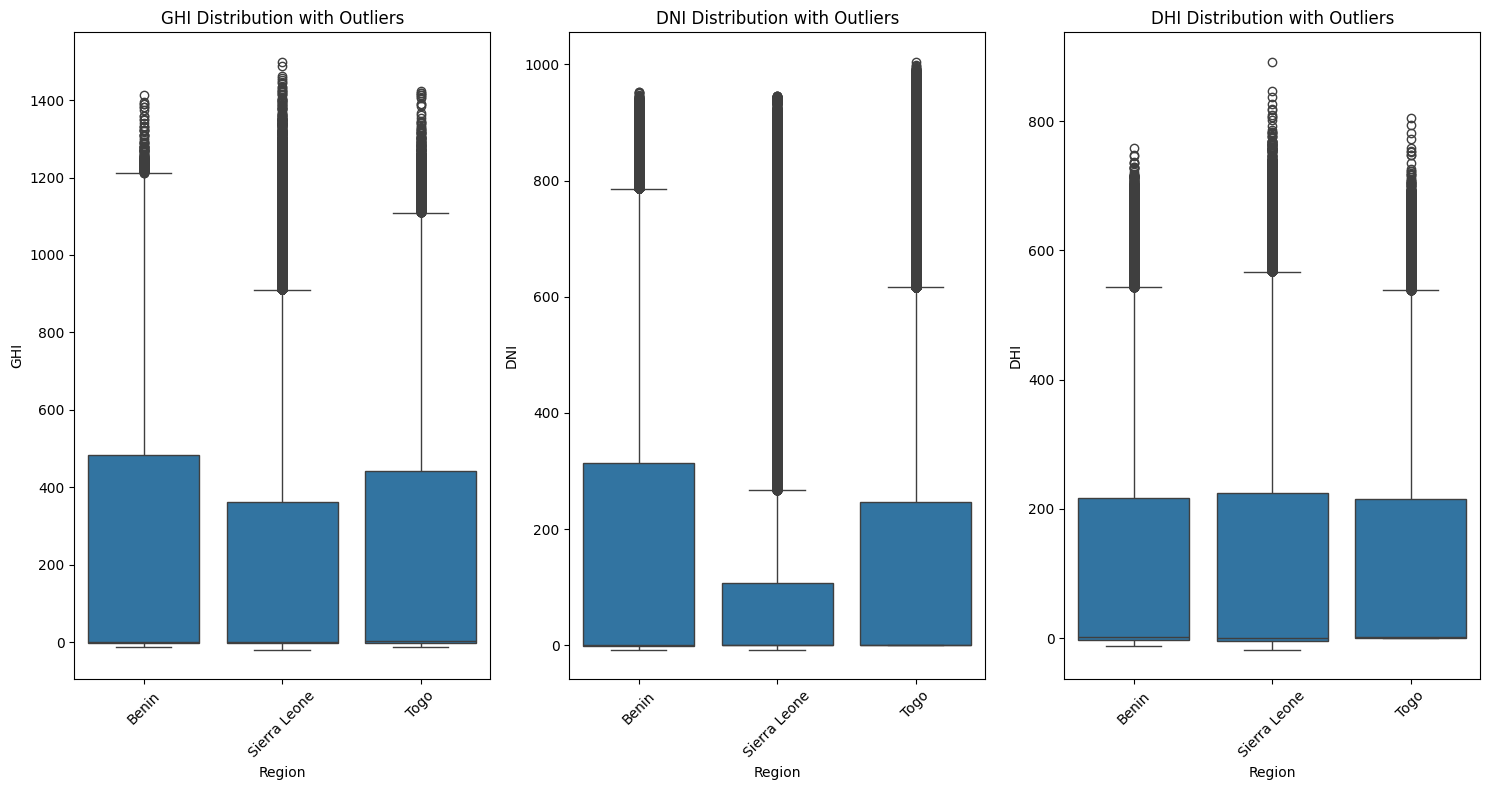


Example records with extreme outliers:
            Timestamp Region     GHI    DNI    DHI
670  2021-08-09 11:11  Benin   836.0  235.0  610.6
671  2021-08-09 11:12  Benin  1274.0  698.8  615.2
672  2021-08-09 11:13  Benin   938.0  340.1  612.8
673  2021-08-09 11:14  Benin   718.5  126.8  593.2
674  2021-08-09 11:15  Benin  1349.0  771.8  618.0


In [28]:
# Define outlier thresholds using z-score method
z_score_threshold = 3

# Calculate z-scores for key measurements
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS']
for col in key_cols:
    z_col = f'{col}_zscore'
    combined_df[z_col] = combined_df.groupby('Region')[col].transform(lambda x: zscore(x))
    
# Identify outliers
outliers = pd.DataFrame()
for col in key_cols:
    z_col = f'{col}_zscore'
    outliers[col] = (abs(combined_df[z_col]) > z_score_threshold).sum()

print("Number of outliers detected (|z-score| > 3):")
print("=" * 50)
print(outliers.T)

# Visualize outlier distribution for key metrics
plt.figure(figsize=(15, 8))
for i, col in enumerate(['GHI', 'DNI', 'DHI']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=combined_df, x='Region', y=col)
    plt.title(f'{col} Distribution with Outliers')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print extreme outlier examples
print("\nExample records with extreme outliers:")
print("=" * 50)
extreme_outliers = combined_df[
    (abs(combined_df['GHI_zscore']) > z_score_threshold) |
    (abs(combined_df['DNI_zscore']) > z_score_threshold) |
    (abs(combined_df['DHI_zscore']) > z_score_threshold)
].head()
print(extreme_outliers[['Timestamp', 'Region', 'GHI', 'DNI', 'DHI']])


# Based on the boxplots above, we can observe:
# 1. GHI (Global Horizontal Irradiance):
#    - Benin shows the highest median GHI values
#    - All regions have significant outliers, particularly on the upper end
#    - Sierra Leone shows slightly lower GHI values compared to other regions
#
# 2. DNI (Direct Normal Irradiance):
#    - Benin leads in DNI measurements, followed by Togo
#    - Sierra Leone shows notably lower DNI values
#    - All regions display substantial outliers
#
# 3. DHI (Diffuse Horizontal Irradiance):
#    - DHI distributions are relatively similar across regions
#    - Togo shows slightly higher median values
#    - Outliers are present but less extreme compared to GHI and DNI


In [19]:
# Calculate summary statistics for each region
summary_stats = combined_df.groupby('Region').agg({
    'GHI': ['mean', 'std', 'min', 'max'],
    'DNI': ['mean', 'std', 'min', 'max'],
    'DHI': ['mean', 'std', 'min', 'max']
}).round(2)
summary_stats

GHI                           DNI                       \
                mean     std   min     max    mean     std  min     max   
Region                                                                    
Benin         240.56  331.13 -12.9  1413.0  167.19  261.71 -7.8   952.3   
Sierra Leone  201.96  298.50 -19.5  1499.0  116.38  218.65 -7.8   946.0   
Togo          230.56  322.53 -12.7  1424.0  151.26  250.96  0.0  1004.5   

                 DHI                       
                mean     std   min    max  
Region                                     
Benin         115.36  158.69 -12.6  759.2  
Sierra Leone  113.72  158.95 -17.9  892.0  
Togo          116.44  156.52   0.0  805.7

# Time Series Analysis

## Solar Irradiance and Temperature Patterns

Let's analyze the temporal patterns in our key metrics:

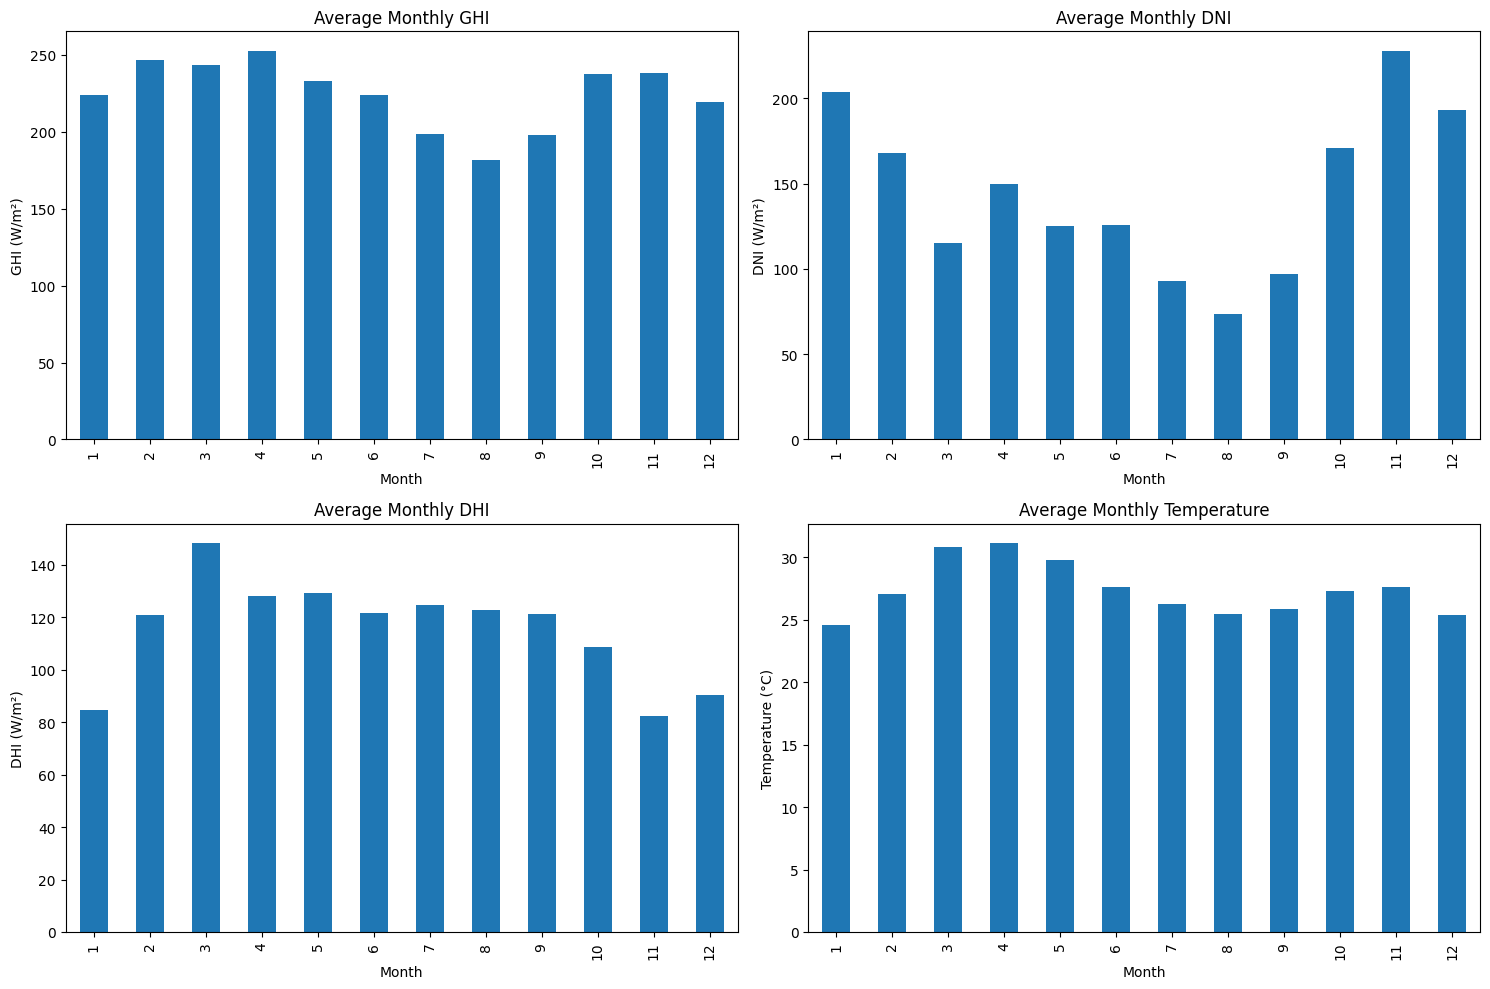

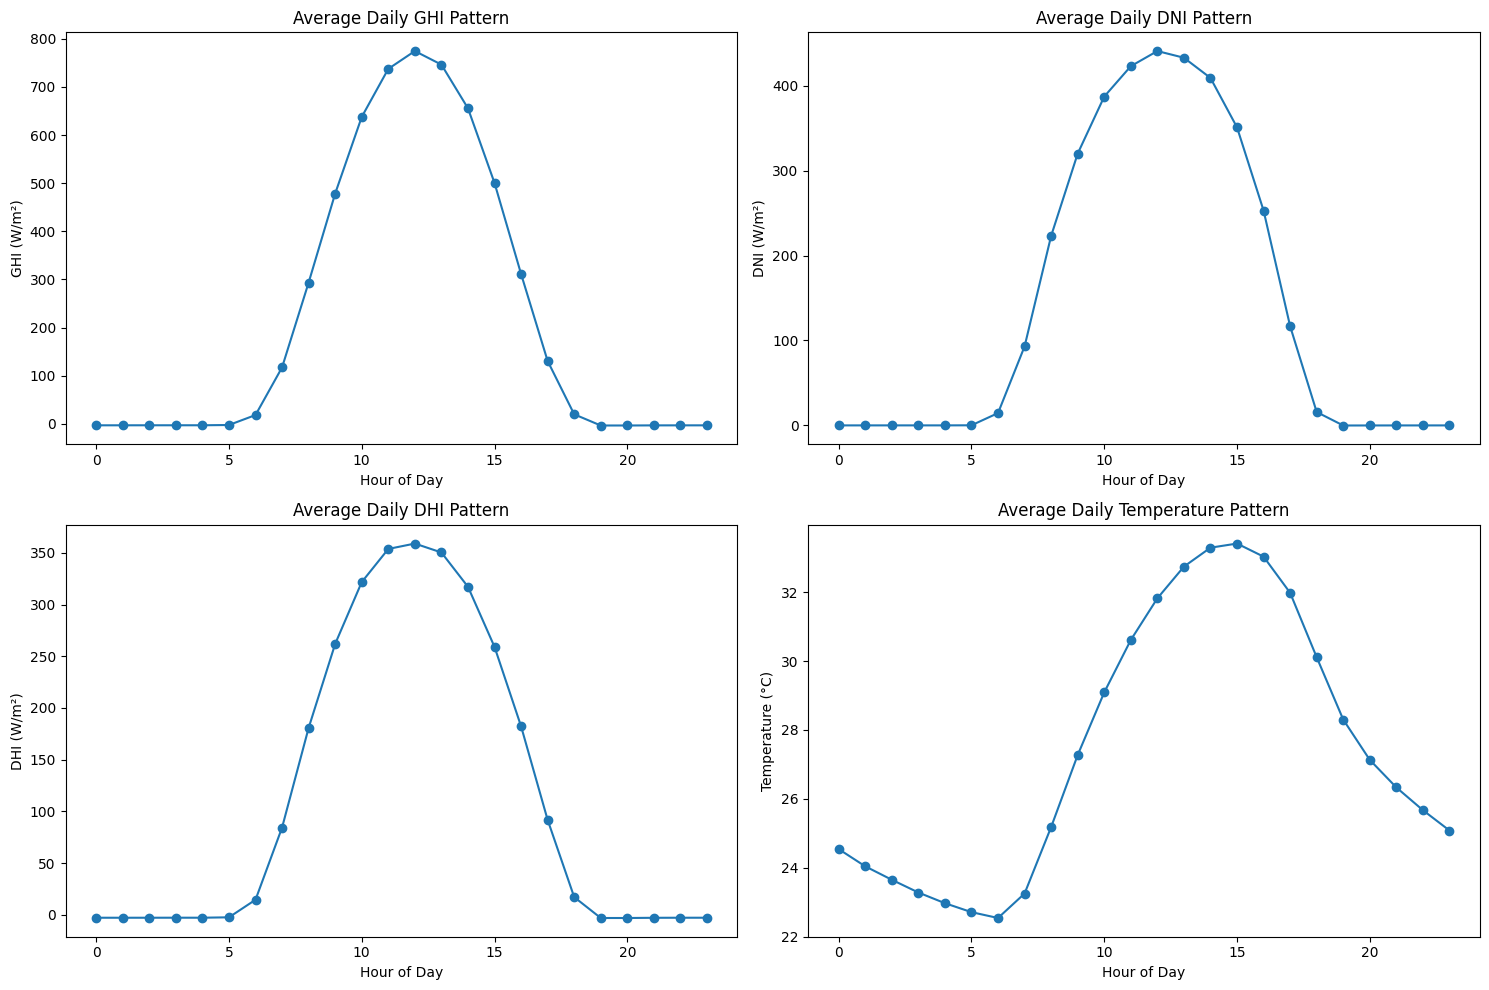

In [29]:
# 1. Monthly patterns
# Extract month and hour from timestamp
combined_df['Month'] = pd.to_datetime(combined_df['Timestamp']).dt.month
combined_df['Hour'] = pd.to_datetime(combined_df['Timestamp']).dt.hour

# Calculate monthly averages
monthly_avg = combined_df.groupby('Month').agg({
    'GHI': 'mean',
    'DNI': 'mean', 
    'DHI': 'mean',
    'Tamb': 'mean'
}).round(2)

# Plot monthly patterns
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
monthly_avg['GHI'].plot(kind='bar')
plt.title('Average Monthly GHI')
plt.xlabel('Month')
plt.ylabel('GHI (W/m²)')

plt.subplot(2,2,2)
monthly_avg['DNI'].plot(kind='bar')
plt.title('Average Monthly DNI')
plt.xlabel('Month')
plt.ylabel('DNI (W/m²)')

plt.subplot(2,2,3)
monthly_avg['DHI'].plot(kind='bar')
plt.title('Average Monthly DHI')
plt.xlabel('Month')
plt.ylabel('DHI (W/m²)')

plt.subplot(2,2,4)
monthly_avg['Tamb'].plot(kind='bar')
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()

# 2. Daily patterns
hourly_avg = combined_df.groupby('Hour').agg({
    'GHI': 'mean',
    'DNI': 'mean',
    'DHI': 'mean',
    'Tamb': 'mean'
}).round(2)

plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
hourly_avg['GHI'].plot(kind='line', marker='o')
plt.title('Average Daily GHI Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('GHI (W/m²)')

plt.subplot(2,2,2)
hourly_avg['DNI'].plot(kind='line', marker='o')
plt.title('Average Daily DNI Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('DNI (W/m²)')

plt.subplot(2,2,3)
hourly_avg['DHI'].plot(kind='line', marker='o')
plt.title('Average Daily DHI Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('DHI (W/m²)')

plt.subplot(2,2,4)
hourly_avg['Tamb'].plot(kind='line', marker='o')
plt.title('Average Daily Temperature Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()

## Impact of Cleaning on Sensor Readings

<Figure size 1000x600 with 0 Axes>

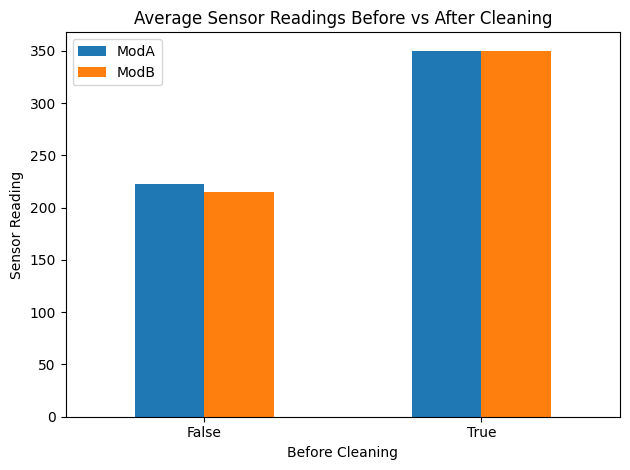

In [30]:
# Calculate average ModA and ModB readings before and after cleaning
cleaning_impact = combined_df.copy()
cleaning_impact['Next_Cleaning'] = cleaning_impact['Cleaning'].shift(-1)
cleaning_impact['Before_Cleaning'] = (cleaning_impact['Cleaning'] == 0) & (cleaning_impact['Next_Cleaning'] == 1)

cleaning_comparison = cleaning_impact.groupby('Before_Cleaning').agg({
    'ModA': 'mean',
    'ModB': 'mean'
}).round(2)

plt.figure(figsize=(10, 6))
cleaning_comparison.plot(kind='bar')
plt.title('Average Sensor Readings Before vs After Cleaning')
plt.xlabel('Before Cleaning')
plt.ylabel('Sensor Reading')
plt.legend(['ModA', 'ModB'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

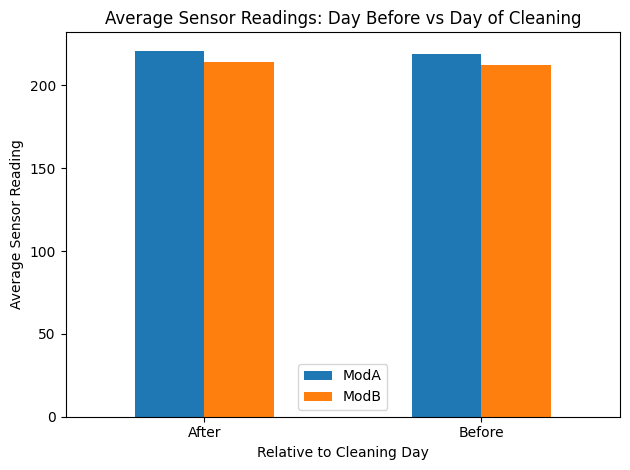

In [31]:
# Calculate average readings for the day before and after cleaning
cleaning_impact['Date'] = pd.to_datetime(cleaning_impact['Timestamp']).dt.date
cleaning_dates = cleaning_impact[cleaning_impact['Cleaning'] == 1]['Date'].unique()

before_after_df = pd.DataFrame()
for date in cleaning_dates:
    # Get day before and day of cleaning
    day_before = cleaning_impact[cleaning_impact['Date'] == date - pd.Timedelta(days=1)][['ModA', 'ModB']].mean()
    day_of = cleaning_impact[cleaning_impact['Date'] == date][['ModA', 'ModB']].mean()
    
    before_after_df = pd.concat([before_after_df, pd.DataFrame({
        'Day': ['Before', 'After'],
        'ModA': [day_before['ModA'], day_of['ModA']],
        'ModB': [day_before['ModB'], day_of['ModB']]
    })])

# Calculate averages
before_after_avg = before_after_df.groupby('Day')[['ModA', 'ModB']].mean()

# Plot
plt.figure(figsize=(10, 6))
before_after_avg.plot(kind='bar')
plt.title('Average Sensor Readings: Day Before vs Day of Cleaning')
plt.xlabel('Relative to Cleaning Day')
plt.ylabel('Average Sensor Reading')
plt.legend(['ModA', 'ModB'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
